In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

transform = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=len(train_dataset), shuffle=False)

test_dataset = datasets.MNIST(root="./data", train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

train_images, train_labels = next(iter(train_loader))
test_images, test_labels = next(iter(test_loader))

print('Train images:', train_images.shape)
print('Train labels', train_labels.shape)
print('Test images:', test_images.shape)
print('Test labels:', test_labels.shape)

Train images: torch.Size([60000, 1, 28, 28])
Train labels torch.Size([60000])
Test images: torch.Size([10000, 1, 28, 28])
Test labels: torch.Size([10000])


In [2]:
X = train_images.view(train_images.size(0), -1).numpy()
y = train_labels.numpy()
print(X.shape)

(60000, 784)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import umap

random_state = 42
n_lin = 10    # target dims for PCA/ICA

# Linear reducers (to 5D)
pca = make_pipeline(StandardScaler(with_mean=True), PCA(n_components=n_lin, random_state=random_state))
X_pca = pca.fit_transform(X)

ica = make_pipeline(StandardScaler(with_mean=True), FastICA(n_components=n_lin, random_state=random_state, max_iter=1000))
X_ica = ica.fit_transform(X)

/home/ignatius/Studies/repos/latent-space-probing/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(60000, 10)


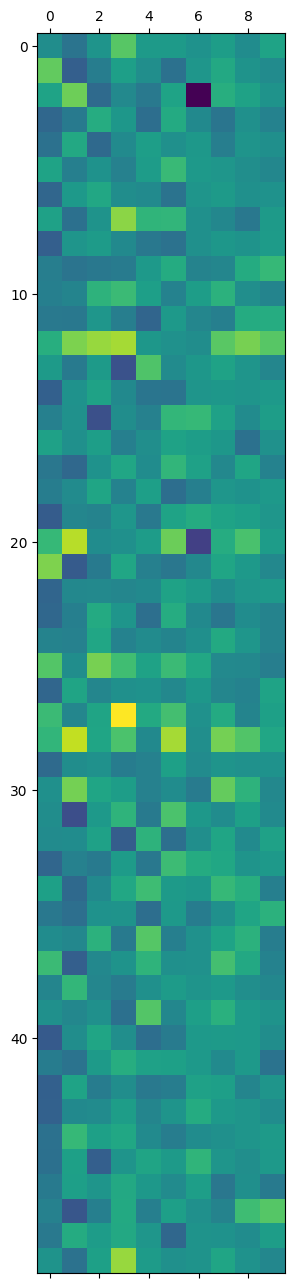

In [ ]:
print(X_pca.shape)
plt.matshow(X_pca[:50])



Reconstruction shape: (60000, 784)
PCA reconstruction MSE: 0.037301797


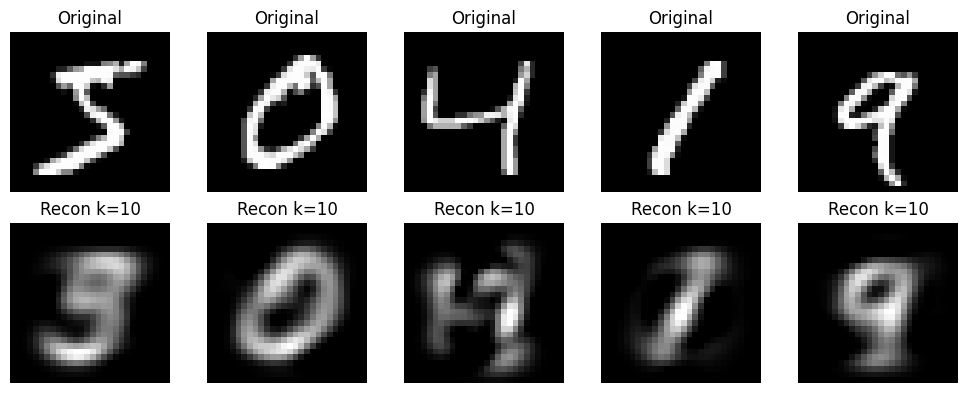

In [8]:
# Reconstruct from PCA back to the original feature space
X_rec = pca.inverse_transform(X_pca)  # shape: (N, 784) for MNIST
print("Reconstruction shape:", X_rec.shape)
print("PCA reconstruction MSE:", np.mean((X - X_rec) ** 2))

# Visualize original vs reconstructed (MNIST: 28x28 grayscale)
n = 5
fig, axes = plt.subplots(2, n, figsize=(2*n, 4))
for i in range(n):
    axes[0, i].imshow(X[i].reshape(28, 28), cmap="gray")
    axes[0, i].set_title("Original"); axes[0, i].axis("off")

    axes[1, i].imshow(np.clip(X_rec[i], 0, 1).reshape(28, 28), cmap="gray")
    axes[1, i].set_title(f"Recon k={n_lin}"); axes[1, i].axis("off")
plt.tight_layout(); plt.show()